In [43]:
import numpy as np
import pandas as pd
import math

from sklearn.linear_model import LogisticRegression as lr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import metrics

import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

reference: https://excelsior-cjh.tistory.com/167

linear (1767, 2)
RBF $\gamma=0.04$ (1767, 2)
sigmoid, $\gamma=10^{-5}, r=.2$ (1767, 2)
poly, $\gamma=10^{-2}, r=1$ (1767, 2)
cosine (1767, 2)


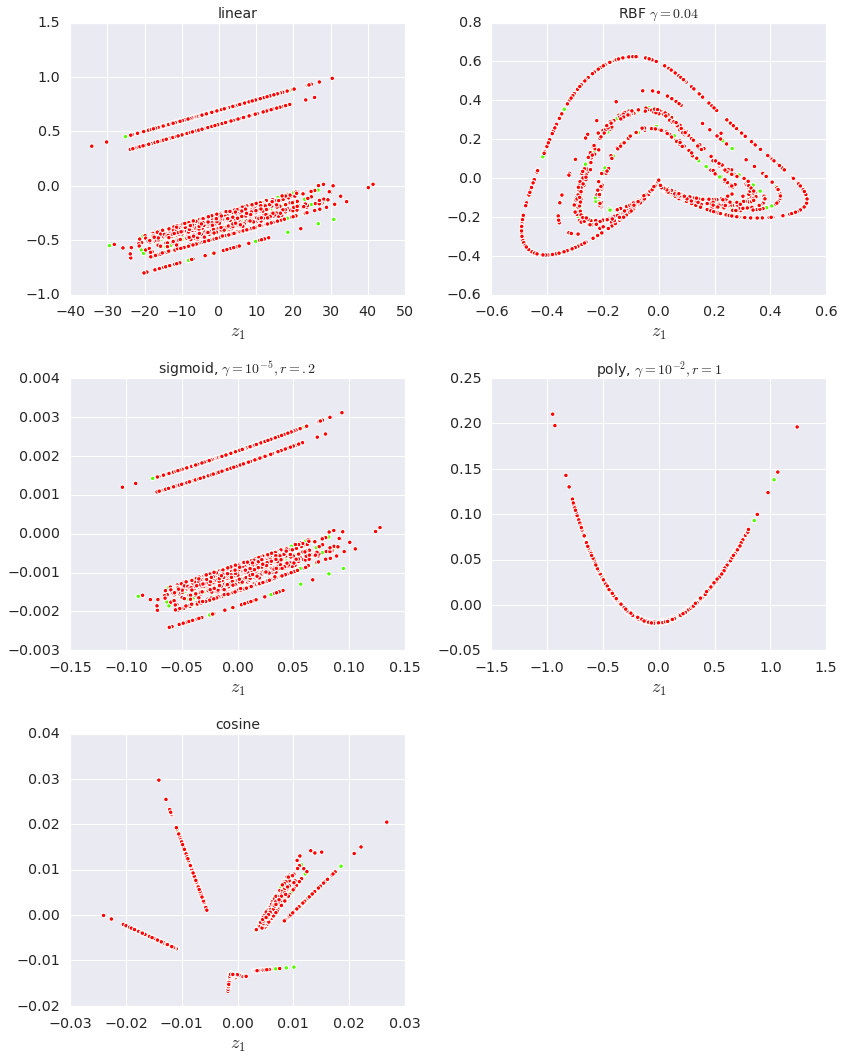

linear (1180, 2)
RBF $\gamma=0.04$ (1180, 2)
sigmoid, $\gamma=10^{-5}, r=.2$ (1180, 2)
poly, $\gamma=10^{-2}, r=1$ (1180, 2)
cosine (1180, 2)


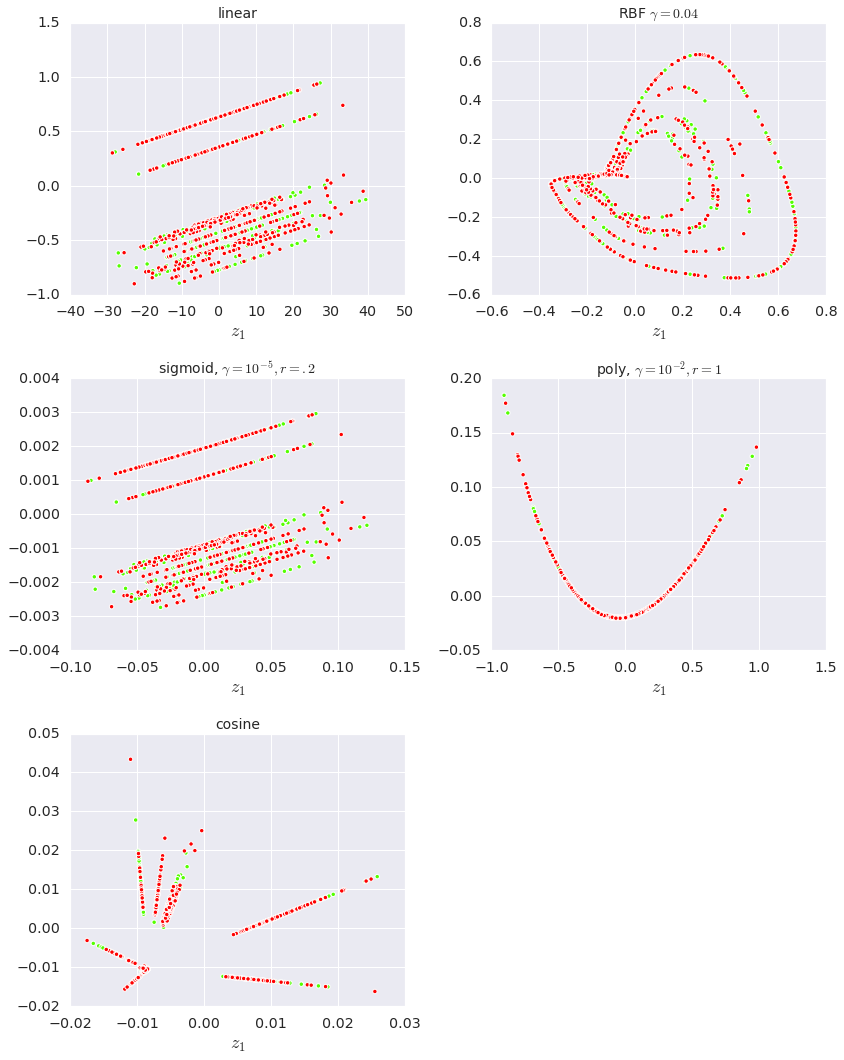

In [55]:
df = pd.read_csv("study_sample.csv")
for i, rgmline in enumerate([1, 2]) :
#for i, rgmline in enumerate([1]) :
    data = df[df['regimen_line']==rgmline]
    data.loc[:, 'treatment'] = data['group'].apply(lambda x: 1 if x=='immuno' else 0)
#     display('1st line regimen')
#     display(pd.pivot_table(data[['treatment','sex','person_id']], \
#                values = 'person_id', index = 'treatment', columns = 'sex',\
#                aggfunc= np.count_nonzero))
    data['immuno'] = data['group'].apply(lambda x: 1 if x=='immuno' else 0)
    T = data['treatment']
    X = data.loc[:,('age', 'sex', 'kcd')]
    X_encoded = pd.get_dummies(X, columns = ['sex','kcd'], drop_first=True)
    pca = KernelPCA(n_components=2)
    X_reduced = pca.fit_transform(X_encoded)
#     print('singular value :', pca.singular_values_)
#     print('singular vector :\n', pca.components_.T)
    #print('explained variance ratio :', pca.explained_variance_ratio_)
#     fig, ax = plt.subplots(1, 3, figsize=(16, 5))
#     ax[0].plot(X_reduced[:,0], X_reduced[:, 1], ',')
    #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’
    lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
    poly_pca = KernelPCA(n_components = 2, kernel="poly", gamma=0.0001, coef0=1, fit_inverse_transform=True)
    cosine_pca = KernelPCA(n_components = 2, kernel="cosine", fit_inverse_transform=True)
    rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.433, fit_inverse_transform=True)
    sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.00001, coef0=.2, fit_inverse_transform=True)
    plt.figure(figsize=(12, 15))
    for subplot, pca, title in ((321, lin_pca, "linear"), 
                                (322, rbf_pca, "RBF $\gamma=0.04$"), 
                                (323, sig_pca, "sigmoid, $\gamma=10^{-5}, r=.2$"), 
                               (324, poly_pca, 'poly, $\gamma=10^{-2}, r=1$'),
                               (325, cosine_pca, 'cosine')):
        X_reduced = pca.fit_transform(X_encoded)
        print(title, X_reduced.shape)
        #if subplot == 132:
        #    X_reduced_rbf = X_reduced

        plt.subplot(subplot)
        #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
        #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
        plt.title(title, fontsize=14)
        plt.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='o',
                    c=data['immuno'].values, cmap='prism')
        plt.xlabel("$z_1$", fontsize=18)
        if subplot == 131:
            plt.ylabel("$z_2$", fontsize=18, rotation=0)
        plt.grid(True)
    plt.tight_layout()
    plt.show()